<a href="https://colab.research.google.com/github/cbmoliveira/TCCPUC/blob/main/COLIVEIRA_TCCPUC_NOTEBOOK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RESULTADOS

### IMPORTAÇÃO DAS BIBLIOTECAS

In [ ]:
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from google.colab import drive
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np




### CARREGAMENTO DA BASE DE DADOS

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/tcc/resultf.csv', sep=',', 
                 index_col='Data',
                 #date_parser=(lambda t:pd.to_datetime(str(t),format='%d/%m/%Y', dayfirst = True)), 
                 header=0)
display(dados)

,CL(cod),Patm(mB),RG(Kj/m²),Tar(°C),UR(%),V(°)
Data,,,,,,
2007-07-09,3.333333,924.700000,373.863833,19.066667,96.000000,111.833333
2007-07-10,5.000000,923.966667,461.679208,19.400000,91.666667,114.250000
2007-07-11,3.000000,924.400000,834.335458,20.266667,81.000000,115.375000
2007-07-12,3.333333,924.833333,553.414042,19.333333,85.666667,128.791667
2007-07-13,5.000000,926.100000,508.040625,19.666667,92.666667,143.083333
...,...,...,...,...,...,...
2020-12-27,2.000000,921.833333,686.362583,20.804167,84.000000,86.541667
2020-12-28,2.000000,922.295833,876.021167,21.383333,79.291667,124.166667
2020-12-29,2.000000,920.925000,1020.476500,21.591667,75.000000,129.166667


### COLUNAS

In [ ]:
dados.columns

Index(['CL(cod)', 'Patm(mB)', 'RG(Kj/m²)', 'Tar(°C)', 'UR(%)', 'V(°)'], dtype='object')

### DIVISÃO EM VARIÁVEL TARGET

In [ ]:
#Classe, target, y
dclass = dados['Tar(°C)']
display(dclass)

Data
2007-07-09    19.066667
2007-07-10    19.400000
2007-07-11    20.266667
2007-07-12    19.333333
2007-07-13    19.666667
                ...    
2020-12-27    20.804167
2020-12-28    21.383333
2020-12-29    21.591667
2020-12-30    22.091667
2020-12-31    21.629167
Name: Tar(°C), Length: 4925, dtype: float64

### DIVISÃO EM VARIÁVEL PREVISORA OU FEATURE

In [ ]:
#Previsores, feature, x
dprev = dados.drop('Tar(°C)', axis=1)
display(dprev)

,CL(cod),Patm(mB),RG(Kj/m²),UR(%),V(°)
Data,,,,,
2007-07-09,3.333333,924.700000,373.863833,96.000000,111.833333
2007-07-10,5.000000,923.966667,461.679208,91.666667,114.250000
2007-07-11,3.000000,924.400000,834.335458,81.000000,115.375000
2007-07-12,3.333333,924.833333,553.414042,85.666667,128.791667
2007-07-13,5.000000,926.100000,508.040625,92.666667,143.083333
...,...,...,...,...,...
2020-12-27,2.000000,921.833333,686.362583,84.000000,86.541667
2020-12-28,2.000000,922.295833,876.021167,79.291667,124.166667
2020-12-29,2.000000,920.925000,1020.476500,75.000000,129.166667


### NORMALIZAÇÃO DOS DADOS

In [ ]:
dnorm = Normalizer().fit_transform(dprev)
display(dnorm)

array([[0.00330604, 0.91712914, 0.37080287, 0.09521401, 0.11091771],
       [0.00479278, 0.88567304, 0.442545  , 0.08786756, 0.10951493],
       [0.00239387, 0.73763115, 0.66576355, 0.06463449, 0.09206425],
       ...,
       [0.00144647, 0.66604624, 0.73804548, 0.05424271, 0.093418  ],
       [0.001537  , 0.70761717, 0.69859505, 0.05885442, 0.08818557],
       [0.00161794, 0.74607823, 0.65414923, 0.06832447, 0.10385184]])

### DIVISÃO DA BASE DE DADOS EM TESTE E TREINAMENTO

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dnorm, dclass, test_size=0.20, random_state=1)

In [ ]:
x_train.shape, y_train.shape

((3940, 5), (3940,))

In [ ]:
x_test.shape, y_test.shape

((985, 5), (985,))

In [ ]:
x_temp = np.concatenate((x_train, x_test), axis=0)
x_temp.shape

(4925, 5)

In [ ]:
y_temp = np.concatenate((y_train, y_test), axis=0)
y_temp.shape

(4925,)

### RLM

In [ ]:
parametros_rlm = {'fit_intercept':[True,False], 
              'copy_X':[True, False]}

In [ ]:
from sklearn.linear_model import LinearRegression
grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=parametros_rlm, error_score='raise')
grid_search.fit(x_temp, y_temp)
melhores_parametros_rlm = grid_search.best_params_
melhor_resultado_rlm = grid_search.best_score_
print(melhores_parametros_rlm)
print(melhor_resultado_rlm)

{'copy_X': True, 'fit_intercept': True}
0.7529749571041797


### SVM

In [ ]:
from sklearn.preprocessing import StandardScaler
SdataX = StandardScaler()
x_temp_s = SdataX.fit_transform(x_temp)
SdataY= StandardScaler()
y_temp_r = y_temp.reshape(-1,1)
#Transforma de uma matriz para vetor
y_temp_s = SdataY.fit_transform(y_temp_r)

In [ ]:
parametros_svr = {'tol': [0.001, 0.0001, 0.00001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [ ]:
from sklearn.svm import SVR
grid_search = GridSearchCV(estimator=SVR(), param_grid=parametros_svr, error_score='raise')
grid_search.fit(x_temp_s, y_temp_s.ravel())
melhores_parametros_svr = grid_search.best_params_
melhor_resultado_svr = grid_search.best_score_
print(melhores_parametros_svr)
print(melhor_resultado_svr)

{'C': 2.0, 'kernel': 'rbf', 'tol': 1e-05}
0.7842788985980657


### RANDOM FOREST

In [ ]:
parametros_fa = {'n_estimators': [10, 40, 100, 150],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "max_features": ["auto", "sqrt", "log2"]}

In [ ]:
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=parametros_fa)
grid_search.fit(x_temp, y_temp)
melhores_parametros_fa = grid_search.best_params_
melhor_resultado_fa = grid_search.best_score_
print(melhores_parametros_fa)
print(melhor_resultado_fa)

{'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
0.7765033948655575


### VALIDAÇÃO CRUZADA

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
resultados_random_forest = []
resultados_multipla = []
resultados_svm = []

for i in range(30):
  print(i)
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  random_forest = RandomForestRegressor(max_features='sqrt', min_samples_leaf = 1, min_samples_split=10, n_estimators = 150)
  scores = cross_val_score(random_forest, x_temp, y_temp, cv = kfold, error_score='raise')
  resultados_random_forest.append(scores.mean(), )

  multipla = LinearRegression(copy_X=True, fit_intercept=True)
  scores = cross_val_score(multipla, x_temp, y_temp, cv = kfold)
  resultados_multipla.append(scores.mean())

  svm = SVR(tol=0.00001, kernel = 'rbf', C = 2.0)
  scores = cross_val_score(svm, x_temp_s, y_temp_s.ravel(), cv = kfold, error_score='raise')
  resultados_svm.append(scores.mean())


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [ ]:
resultados = pd.DataFrame({'FA': resultados_random_forest,
                           'RML': resultados_multipla,
                           'MSV': resultados_svm})
resultados

,FA,RML,MSV
0,0.775082,0.752723,0.784550
1,0.774426,0.752442,0.785285
2,0.776589,0.753181,0.785118
3,0.775793,0.752226,0.784179
4,0.776949,0.752838,0.784599
5,0.777126,0.752792,0.785289
6,0.776910,0.752750,0.785144
7,0.776339,0.752417,0.785109
8,0.777990,0.752260,0.784910
9,0.777128,0.752507,0.784121


In [ ]:
resultados.describe()

,FA,RML,MSV
count,30.000000,30.000000,30.000000
mean,0.776828,0.752815,0.785085
std,0.001104,0.000283,0.000498
min,0.774426,0.752226,0.784059
25%,0.776145,0.752657,0.784821
50%,0.776930,0.752815,0.785113
75%,0.777864,0.753055,0.785358
max,0.778773,0.753253,0.786084


In [ ]:
(resultados.std() / resultados.mean()) * 100

FA     0.142133
RML    0.037610
MSV    0.063489
dtype: float64

### TESTE DE NORMALIDADE

In [ ]:
alpha=0.5

In [ ]:
from scipy.stats  import shapiro

In [ ]:
shapiro(resultados_random_forest), shapiro(resultados_multipla), shapiro(resultados_svm)

((0.9755390882492065, 0.6986150145530701),
 (0.961087167263031, 0.3301452398300171),
 (0.9752053022384644, 0.6887798309326172))

p<=0,05 - não são normais
p>0,05
Todos são normais.

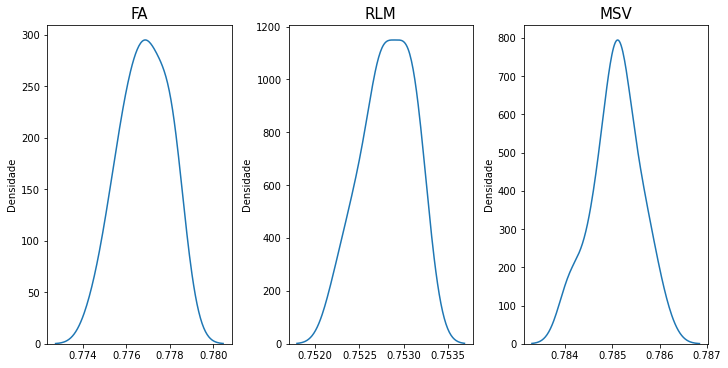

In [ ]:
#from scipy.stats import laplace
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(10,5), constrained_layout=True)#, sharex=True)
#fig.suptitle('TESTE DE NORMALIDADE', y=1.07, fontsize=20)

ax[0].set_ylabel('Densidade')
ax[1].set_ylabel('Densidade')
ax[2].set_ylabel('Densidade')

#Nuvens Baixas
sns.kdeplot(resultados_random_forest, ax=ax[0]).set_title('FA', fontsize=15)
sns.kdeplot(resultados_multipla, ax=ax[1]).set_title('RLM', fontsize=15)
sns.kdeplot(resultados_svm, ax=ax[2]).set_title('MSV', fontsize=15)


plt.savefig('/content/drive/MyDrive/tcc/shap.png', bbox_inches='tight')

### ANOVA E TUKEY

In [ ]:
from scipy.stats import f_oneway

In [ ]:
_, p = f_oneway(resultados_random_forest, resultados_multipla, resultados_svm)
p

4.714764857516835e-115

In [ ]:
alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada. Dados são diferentes')
else:
  print('Hipótese alternativa rejeitada. Resultados são iguais')

Hipótese nula rejeitada. Dados são diferentes


In [ ]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_random_forest, resultados_multipla, resultados_svm]),
                         'algoritmo': ['random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest', 
                          'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                          'multipla','multipla','multipla','multipla','multipla','multipla','multipla','multipla','multipla','multipla','multipla','multipla','multipla','multipla','multipla','multipla','multipla','multipla','multipla','multipla','multipla','multipla','multipla','multipla','multipla','multipla','multipla','multipla','multipla','multipla']}

In [ ]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.775450,random_forest
1,0.775401,random_forest
2,0.776739,random_forest
3,0.775697,random_forest
4,0.776792,random_forest
...,...,...
85,0.785602,multipla
86,0.784987,multipla
87,0.784895,multipla
88,0.784733,multipla


In [ ]:
from statsmodels.stats.multicomp import MultiComparison
from pandas.testing import assert_frame_equal

In [ ]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [ ]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj  lower   upper  reject
-----------------------------------------------------------------
     multipla random_forest  -0.0083 0.001 -0.0087 -0.0079   True
     multipla           svm  -0.0323 0.001 -0.0327 -0.0319   True
random_forest           svm   -0.024 0.001 -0.0244 -0.0236   True
-----------------------------------------------------------------


Como p foi menor que 0.05, então temos que todos são diferentes.

In [ ]:
resultados.mean()

Random forest    0.776800
Reg. Multipla    0.752815
SVM              0.785085
dtype: float64

In [ ]:
import pandas as pd
colnames = ['Modelo','Média']
med2 = pd.DataFrame([['FA','0,77'], ['RLM','0,75'], ['MSV','0,78']], columns=colnames)
med2.set_index('Modelo', inplace = True)
display(med2)

,Média
Modelo,
FA,"0,77"
RLM,"0,75"
MSV,"0,78"


Como a média de SVM foi a maior, e ela quando comparada aos outros mostra que foi diferente, então estatisticamente podemos concluir que a SVM é o melhor modelo estatístico para prever a temperatura com essas variáveis.

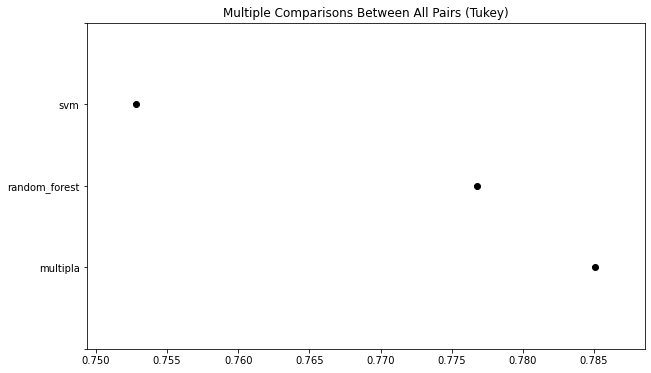

In [ ]:
teste_estatistico.plot_simultaneous();